#Euro 2024 Winner Prediction
###- Based on Players Stats

In [6]:
!pip install ydata-profiling

In [7]:
#iimportando librerias principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport


In [8]:
# Importando el dataset
dataset = pd.read_csv('euro2024_players.csv')

In [9]:
dataset

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
...,...,...,...,...,...,...,...,...,...,...
618,Adam Hlozek,Second Striker,21,Bayer 04 Leverkusen,188,right,31,2,12000000,Czech Republic
619,Patrik Schick,Centre-Forward,28,Bayer 04 Leverkusen,191,left,37,18,22000000,Czech Republic
620,Mojmír Chytil,Centre-Forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic
621,Jan Kuchta,Centre-Forward,27,AC Sparta Prague,185,right,20,3,5000000,Czech Republic


##EDA

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [11]:
dataset[dataset.duplicated()] # verificando filas duplicadas

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country


In [12]:
dataset.isna().sum() # verificando valores faltantes

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

In [13]:
# columnas que no aportan informacion y tienen valores faltantes
limpieza = ['Foot']
dataset.drop(columns=limpieza, inplace=True)
dataset = dataset.dropna()

In [14]:
# Posiciones del dataset original
dataset['Position'].unique()

array(['Goalkeeper', 'Centre-Back', 'Left-Back', 'Right-Back',
       'Defensive Midfield', 'Central Midfield', 'Attacking Midfield',
       'Left Winger', 'Right Winger', 'Second Striker', 'Centre-Forward',
       'Right Midfield', 'Left Midfield'], dtype=object)

In [15]:
# Definiendo el diccionario de mapeo para clasificar las posiciones unicamente en 4 en vez de 13
posicion_mapeo = {
    'Goalkeeper': 'Goalkeeper',
    'Centre-Back': 'Full-Back',
    'Right-Back': 'Full-Back',
    'Left-Back': 'Full-Back',
    'Defensive Midfield': 'Midfielder',
    'Central Midfield': 'Midfielder',
    'Attacking Midfield': 'Midfielder',
    'Right Midfield': 'Midfielder',
    'Left Midfield': 'Midfielder',
    'Right Winger': 'Forward',
    'Left Winger': 'Forward',
    'Second Striker': 'Forward',
    'Centre-Forward': 'Forward'
}

In [16]:
#Transformando la variable 'position'
dataset['Position'] = dataset['Position'].replace(posicion_mapeo)


##Analisis Univariado y Multivariado

In [17]:
dataset.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


In [37]:
#Profiling Report of Europlayers dataset, using ydata-profiling
profile = ProfileReport(dataset,title="Euro players")
profile.to_file("Players.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
# Descargar el archivo CSV limpio
from google.colab import files

dataset.to_csv('euro2024_players.clean.csv', index=False)
files.download('euro2024_players.clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
dataset

,Name,Position,Age,Club,Height,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,0,0,3000000,Germany
3,Nico Schlotterbeck,Full-Back,24,Borussia Dortmund,191,12,0,40000000,Germany
4,Jonathan Tah,Full-Back,28,Bayer 04 Leverkusen,195,25,0,30000000,Germany
...,...,...,...,...,...,...,...,...,...
618,Adam Hlozek,Forward,21,Bayer 04 Leverkusen,188,31,2,12000000,Czech Republic
619,Patrik Schick,Forward,28,Bayer 04 Leverkusen,191,37,18,22000000,Czech Republic
620,Mojmír Chytil,Forward,25,SK Slavia Prague,187,12,4,6500000,Czech Republic
621,Jan Kuchta,Forward,27,AC Sparta Prague,185,20,3,5000000,Czech Republic


##Modelos


Se verifica que tanto afecta la edad a las caps

In [40]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [41]:
variables = ['Age', 'Caps']
datasetModel = dataset[variables].copy()

In [42]:
X = datasetModel.iloc[:, 1].values #Endogena Caps
y = datasetModel.iloc[:, 0].values #Exogena Edad

In [43]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Redimensionar X_train para que tenga una forma bidimensional
X_train = X_train.reshape(-1, 1)

# Inicializar el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
X_test = X_test.reshape(-1, 1)
y_pred = modelo.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# También puedes imprimir los coeficientes de la regresión
print("Coeficiente:", modelo.coef_)
print("Intercepto:", modelo.intercept_)


Error cuadrático medio (MSE): 11.014345531104759
Coeficiente: [0.08467099]
Intercepto: 24.442903435972827


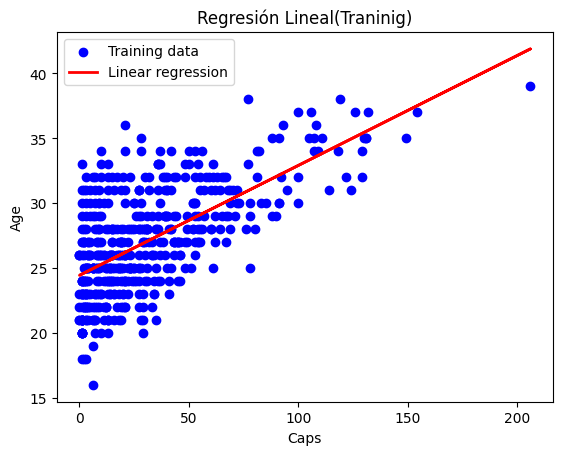

In [44]:
# Graficar los datos de entrenamiento
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Graficar la línea de regresión
plt.plot(X_train, modelo.predict(X_train), color='red', linewidth=2, label='Linear regression')

# Agregar etiquetas y leyenda
plt.title('Regresión Lineal(Traninig)')
plt.xlabel('Caps')
plt.ylabel('Age')
plt.legend()

# Mostrar la gráfica
plt.show()


Se verifica que tanto afectan las caps al precio de mercado

In [45]:
variables = ['MarketValue', 'Caps']
datasetModel = dataset[variables].copy()

In [46]:
X = datasetModel.iloc[:, 0].values #Endogena Market Value
y = datasetModel.iloc[:, 1].values #Exogena Caps

In [47]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Redimensionar X_train para que tenga una forma bidimensional
X_train = X_train.reshape(-1, 1)

# Inicializar el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
X_test = X_test.reshape(-1, 1)
y_pred = modelo.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# También puedes imprimir los coeficientes de la regresión
print("Coeficiente:", modelo.coef_)
print("Intercepto:", modelo.intercept_)


Error cuadrático medio (MSE): 977.1306656950081
Coeficiente: [1.78874477e-08]
Intercepto: 30.337370446040225


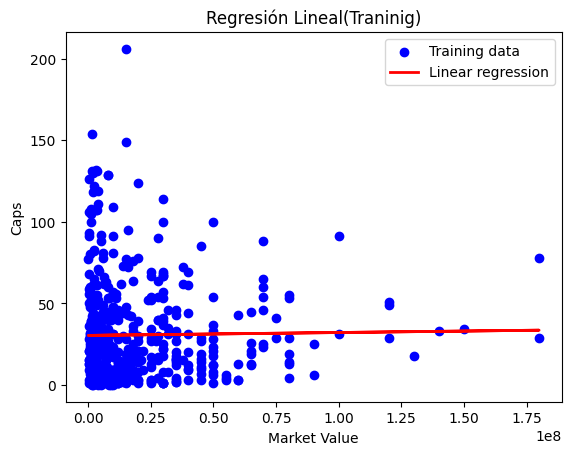

In [48]:
# Graficar los datos de entrenamiento
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Graficar la línea de regresión
plt.plot(X_train, modelo.predict(X_train), color='red', linewidth=2, label='Linear regression')

# Agregar etiquetas y leyenda
plt.title('Regresión Lineal(Traninig)')
plt.xlabel('Market Value')
plt.ylabel('Caps')
plt.legend()

# Mostrar la gráfica
plt.show()

No hay relacion directa entre Market Value y Caps por lo que no se pueden considerar sustitutos

In [49]:
#Calculando el indice de valor de mercado por país
country_marketValue = dataset.groupby('Country')['MarketValue'].mean().reset_index()

country_marketValue.columns = ['Country', 'MeanMarketValue'] # Renombrar las columnas

eurocopa_marketValue = country_marketValue['MeanMarketValue'].sum()

indice_marketValue = country_marketValue['MeanMarketValue'] / eurocopa_marketValue # Formula Indice de valor de mercado

print(indice_marketValue)

0     0.009676
1     0.020418
2     0.052705
3     0.028412
4     0.016812
5     0.036025
6     0.131354
7     0.111270
8     0.013885
9     0.073784
10    0.014258
11    0.061169
12    0.073264
13    0.017734
14    0.091428
15    0.007987
16    0.017982
17    0.027034
18    0.013586
19    0.012095
20    0.083711
21    0.024450
22    0.028100
23    0.032860
Name: MeanMarketValue, dtype: float64


In [50]:
#Calculando el indice de experiencia que tiene cada pais
country_totalCaps = dataset.groupby('Country')['Caps'].sum().reset_index()

country_totalCaps.columns = ['Country', 'TotalCaps']# Renombrar las columnas

eurocopa_totalCaps = country_totalCaps['TotalCaps'].sum()

indice_totalCaps = country_totalCaps['TotalCaps'] / eurocopa_totalCaps # Formula Indice de experiencia

print(indice_totalCaps)

0     0.035924
1     0.032432
2     0.050209
3     0.060949
4     0.021427
5     0.056664
6     0.034443
7     0.044230
8     0.039680
9     0.047934
10    0.039680
11    0.027988
12    0.044336
13    0.043648
14    0.058886
15    0.031215
16    0.034019
17    0.045500
18    0.045606
19    0.040791
20    0.028305
21    0.057775
22    0.033437
23    0.044918
Name: TotalCaps, dtype: float64


In [62]:
#Calculando la probabilidad de ganar incluyendo experiencia y valor de mercado por pais

winning_probability = (indice_marketValue * (0.6) + indice_totalCaps * (0.4))*100 # se agregó un peso del 60% al valor de mercado y un 40% a la experiencia

winning_probability_rounded = [round(prob, 2) for prob in winning_probability] # Redondear a dos decimales

In [63]:
#Imprimiendo resultado
paises_lista = sorted(dataset['Country'].unique())

resultado= pd.DataFrame({'Country': paises_lista, 'Probability': winning_probability_rounded})

print(resultado)

           Country  Probability
0          Albania         2.02
1          Austria         2.52
2          Belgium         5.17
3          Croatia         4.14
4   Czech Republic         1.87
5          Denmark         4.43
6          England         9.26
7           France         8.45
8          Georgia         2.42
9          Germany         6.34
10         Hungary         2.44
11           Italy         4.79
12     Netherlands         6.17
13          Poland         2.81
14        Portugal         7.84
15         Romania         1.73
16        Scotland         2.44
17          Serbia         3.44
18        Slovakia         2.64
19        Slovenia         2.36
20           Spain         6.15
21     Switzerland         3.78
22         Turkiye         3.02
23         Ukraine         3.77


In [65]:
#Resultado en orden descendente
resultado_final = resultado.sort_values(by='Probability', ascending=False)

print(resultado_final)

           Country  Probability
6          England         9.26
7           France         8.45
14        Portugal         7.84
9          Germany         6.34
12     Netherlands         6.17
20           Spain         6.15
2          Belgium         5.17
11           Italy         4.79
5          Denmark         4.43
3          Croatia         4.14
21     Switzerland         3.78
23         Ukraine         3.77
17          Serbia         3.44
22         Turkiye         3.02
13          Poland         2.81
18        Slovakia         2.64
1          Austria         2.52
10         Hungary         2.44
16        Scotland         2.44
8          Georgia         2.42
19        Slovenia         2.36
0          Albania         2.02
4   Czech Republic         1.87
15         Romania         1.73


In [57]:
#Descargando resultados de la prediccion en formato CSV
resultado_final.to_csv('euro2024_prediction.csv', index=False)
files.download('euro2024_prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

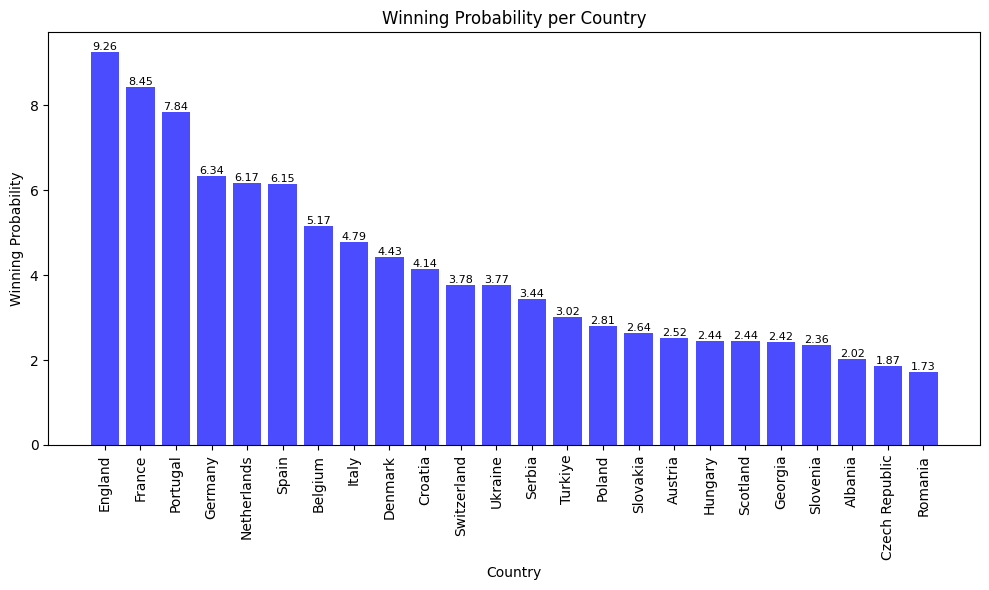

In [58]:
import matplotlib.pyplot as plt

# Ordenando los datos para graficar resultados
paises_ordenados = [pais for _, pais in sorted(zip(winning_probability, paises_lista), reverse=True)]
probabilidades_ordenadas = sorted(winning_probability, reverse=True)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear gráfico de barras ordenado en orden descendente
bars = ax.bar(paises_ordenados, probabilidades_ordenadas, color='blue', alpha=0.7)

# Añadir etiquetas y título
ax.set_xlabel('Country')
ax.set_ylabel('Winning Probability')
ax.set_title('Winning Probability per Country')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)

# Mostrar valor numérico encima de cada barra
for bar, prob in zip(bars, probabilidades_ordenadas):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{prob:.2f}',
            ha='center', va='bottom', fontsize=8)

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()
